# AI for Search and Optimization

# Single vs. Population-Based Search: Approaches to the Traveling Salesman Problem

## Project Overview
In this notebook, we’ll dive into solving the **Traveling Salesman Problem (TSP)** using four different algorithms: **Hill Climbing**, **Simulated Annealing**, **Tabu Search**, and **Genetic Algorithm**. The goal of the TSP is simple: find the shortest possible route that visits all the cities exactly once and returns to the starting point. While it sounds straightforward, it’s a complex optimization problem. The challenge is to evaluate how well each of these algorithms performs, so we can choose the most effective one. After selecting the best of the three single-member search algorithms (Hill Climbing, Simulated Annealing, and Tabu Search), we’ll compare its performance against **Genetic Algorithm** on different problem sizes (10, 20, 30, 40, and 50 cities).

---

## Objectives
1. **Implement and Evaluate Three Search Algorithms**:
   - We’ll implement **Hill Climbing**, **Simulated Annealing**, and **Tabu Search** to solve the TSP and test them on problems with different sizes (10, 20, 30, 40, and 50 cities).
   - The goal is to find the algorithm that performs the best based on solution quality and how efficiently it solves the problem.

2. **Comparison with Genetic Algorithm**:
   - Once we have our best-performing algorithm, we’ll compare it against **Genetic Algorithm** to see how they stack up in terms of solving the TSP for both small (10, 20) and large (30, 40, 50) problem sizes.

3. **Key Metrics for Comparison**:
   - We’ll compare the algorithms based on:
     - **Solution Quality** (i.e., the best routes found by each algorithm)
     - **Efficiency** (i.e., how long each algorithm takes to find a solution)

4. **Statistical Validation**:
   - To make sure our results are solid, we’ll perform some statistical tests to back up any performance differences between the algorithms.

5. **Justifications and Recommendations**:
   - After testing, we’ll explain why we chose a particular algorithm as the best. We’ll also discuss the strengths and weaknesses of each approach and give recommendations for when each algorithm is best used.

---

## Methodology
Here’s how we’ll go about the analysis:
1. **Data Preparation**:
   - We’ll use the  datasets for city sizes ranging from 10 to 50 cities provided by the Module Mentor and prepare them for use in the algorithms.

2. **Algorithm Implementation**:
   - **Hill Climbing**: We’ll start with the basic algorithm, then try some variants like Steepest-Ascent, Simple Hill Climbing, and Stochastic Hill climbing.
   - **Simulated Annealing**: We’ll experiment with different cooling schedules to see how this affects performance.
   - **Tabu Search**: This algorithm uses a memory (called the Tabu list) to avoid revisiting the same solutions, and we’ll see how it performs.
   - **Genetic Algorithm**: We’ll implement this population-based approach to compare it with the others.

3. **Comparative Analysis**:
    - First, we will pick the best Single Search Algorithm  amongst the three Algorithms and compare it with the Population-based Algorithm
   - We’ll evaluate both the  algorithm on different problem sizes (10, 20, 30, 40, and 50 cities) based on the quality of the solutions they find and how quickly they converge.

5. **Visualization**:
   - We’ll create graphs that show how each algorithm performs across different problem sizes, comparing things like solution quality over time and computational efficiency.

6. **Discussion and Recommendations**:
   - Once we’ve completed the analysis, we’ll discuss our findings and offer insights into which algorithms are best suited for different scenarios.

---

This notebook aims to provide a thorough comparison of these four algorithms to solve the Traveling Salesman Problem. Through this analysis, we’ll identify which single-member search algorithm works best for this problem and how it measures up against a population-based approach like Genetic Algorithm. Our findings will help determine which algorithm to use depending on the size and complexity of the problem at hand.

# Table of Contents
  
- [Section 1: Importing Libraries](#section-1-importing-libraries)

- [Section 2: Load and Visualize the Data](#section-2-load-and-visualize-the-data)

- [Section 3: Single-Solution Driven Search Algorithms](#section-3-single-solution-driven-search-algorithms)


  - [Hill Climbing Implementation](#31-hill-climbing-implementation)  
    - [Standard Hill Climbing](#311-standard-hill-climbing)  
    - [Steepest-Ascent Hill Climbing](#312-steepest-ascent-hill-climbing)  
    - [Stochastic Hill Climbing](#313-stochastic-hill-climbing)
      
  - [Simulated Annealing Implementation](#32-simulated-annealing-implementation)
 
     
  - [Tabu Search Implementation](#33-tabu-search-implementation)  
  
- [Section 4: Comparing Tabu Search with Genetic Algorithm](#section-4-comparing-tabu-search-with-genetic-algorithm)

      
- [Section 5: Hyperparameter Tuning for Both Models](#section-5-hyperparameter-tuning-for-both-models)

    
- [Section 6: Analysis of Results from Normal and Enhanced Algorithms](#section-6-analysis-of-results-from-normal-and-enhanced-algorithms)

   
- [Section 7: Comparing Tabu Search and Genetic Algorithm](#section-7-comparing-tabu-search-and-genetic-algorithm)

     
- [Section 8: Conclusion](#section-8-conclusion)

  
- [References](#references)  


# Section 1: Importing Libraries

In [1]:
# Import necessary libraries

# numpy is used for numerical operations and handling arrays
import numpy as np 

# pandas is used for data manipulation and analysis, especially with dataframes
import pandas as pd

# matplotlib.pyplot is used for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# random is used to generate random numbers, select random elements, etc.
import random

# time is used for time-related tasks like pausing or measuring time intervals
import time

# scipy.spatial.distance is used for computing distances between points (e.g., Euclidean distance)
from scipy.spatial.distance import pdist, squareform


# Section 2: Load and Visualize the Data

This step involves loading the dataset containing city coordinates and creating a scatter plot to visualize them. Loading the data ensures it’s correctly imported into the environment, while visualizing it helps us understand the spatial layout of the cities and detect any outliers or anomalies. This visual overview is crucial for setting the stage for further analysis and optimization in the Traveling Salesman Problem.

### 2.1 Loading the Dataset

In [2]:
# Loading the Dataset using Pandas Library
file_path = 'cities.csv'
cities = pd.read_csv('cities.csv')
print(cities.head())  # Display the city coordinates


     City          X          Y
0  City_1  37.454012  95.071431
1  City_2  73.199394  59.865848
2  City_3  15.601864  15.599452
3  City_4   5.808361  86.617615
4  City_5  60.111501  70.807258


### 2.2 Explore the Data

In [8]:
# Get basic statistical details about the DataFrame
print(cities.describe())

# Check for any missing values in the DataFrame
print(cities.isnull().sum())


               X          Y
count  50.000000  50.000000
mean   44.071678  49.964471
std    30.126572  29.372317
min     0.552212   4.645041
25%    16.247022  20.212154
50%    38.160870  50.470567
75%    72.391897  76.360141
max    96.958463  98.688694
City    0
X       0
Y       0
dtype: int64


In [9]:
# Reload and reinitialize the data if necessary
cities_data = pd.read_csv('cities.csv')
citiesplot = cities_data[['City', 'X', 'Y']].to_dict('records')


### 2.3 Vizualizing the Data

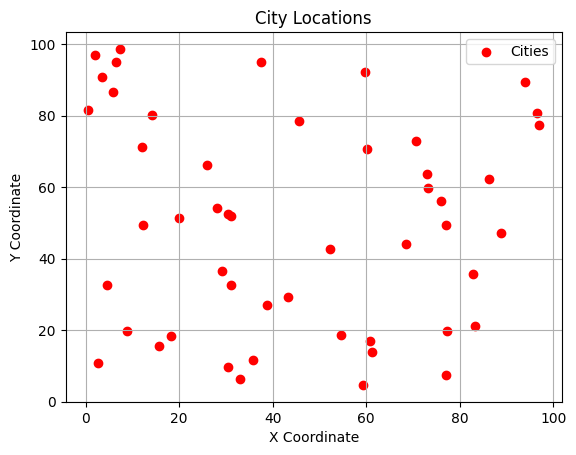

In [10]:
# Function to visualize the cities
def plot_cities(citiesplot):
    if isinstance(citiesplot, list) and isinstance(citiesplot[0], dict):
        # Extract X and Y coordinates from the city data
        x_coords = [city['X'] for city in citiesplot]
        y_coords = [city['Y'] for city in citiesplot]
    else:
        raise TypeError("Expected 'cities' to be a list of dictionaries with 'X' and 'Y' keys.")

    # Plot the cities
    plt.scatter(x_coords, y_coords, c='red', label='Cities')
    plt.title('City Locations')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
plot_cities(citiesplot)


In [16]:
# Extracting the 'X' and 'Y' columns from the 'cities' DataFrame and storing them as a numpy array
coordinates = cities[['X', 'Y']].values

# Function to compute the Euclidean distance between two cities
# This function takes two cities' coordinates and calculates the Euclidean distance
def euclidean_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

# Function to calculate the distance matrix for all pairs of cities
# This function uses the euclidean_distance function to compute the distances between all cities in the 'cities' DataFrame
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    dist_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            dist_matrix[i][j] = euclidean_distance(cities.iloc[i][['X', 'Y']].values, cities.iloc[j][['X', 'Y']].values)
    return dist_matrix

# Calling the function and printing the resulting distance matrix
distance_matrix_result = calculate_distance_matrix(cities)
print(distance_matrix_result)


[[ 0.         50.17136011 82.42154906 ... 60.49207571 54.37567184
  91.22696274]
 [50.17136011  0.         72.64288904 ... 11.187108   27.03172215
  86.02908076]
 [82.42154906 72.64288904  0.         ... 70.16204625 45.63077876
  13.91766523]
 ...
 [60.49207571 11.187108   70.16204625 ...  0.         25.69240392
  83.95021904]
 [54.37567184 27.03172215 45.63077876 ... 25.69240392  0.
  59.11825269]
 [91.22696274 86.02908076 13.91766523 ... 83.95021904 59.11825269
   0.        ]]


# Section 3: Single-Solution Driven Search Algorithms
- Single-solution driven search algorithms work by starting with an initial solution and gradually improving it through a series of steps. They use smart strategies, often based on heuristics, to guide the search and make the process more efficient.

## 3.1 Hill Climbing Implementation(Standard, Steepest, Stocastic )
- Hill Climbing is an optimization algorithm that iteratively moves towards better solutions by choosing neighbors with higher values.
- There are three main variations: Standard (greedy approach), Steepest (explores all neighbors and chooses the best), and Stochastic (randomly selects the next best move).


### 3.1.1 Standard Hill Climbing:
- This version explores the neighborhood of the current solution and moves to the best neighbor if it improves the solution.

In [46]:
# Standard Hill Climbing

def hill_climbing(distance_matrix):
    n = len(distance_matrix)  # Get the number of cities (n)
    
    # Random initial solution: Start with a random permutation of cities
    current_solution = list(range(n))
    random.shuffle(current_solution)  # Shuffle the cities to get a random starting point
    best_solution = current_solution  # Initialize the best solution as the current one
    best_cost = calculate_total_distance(current_solution, distance_matrix)  # Calculate the initial cost
    
    # Loop until no improvement is found
    improved = True
    while improved:
        improved = False  # Reset the improvement flag
        for i in range(n - 1):  # Iterate through all possible pairs of cities
            for j in range(i + 1, n):
                # Swap two cities to create a new solution
                new_solution = current_solution[:]
                new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
                new_cost = calculate_total_distance(new_solution, distance_matrix)  # Calculate the cost of the new solution
                
                # If we found a better solution, accept it
                if new_cost < best_cost:  # If new solution is better, update the best solution
                    best_solution = new_solution
                    best_cost = new_cost
                    improved = True  # Mark that an improvement was made
                    current_solution = new_solution  # Move to the better solution
                    break  # Exit inner loop to continue with the outer loop
            if improved:
                break  # Exit the outer loop if an improvement was found
    
    return best_solution, best_cost  # Return the best solution and its cost

# Testing the Standard Hill Climbing algorithm with the provided distance matrix

# Running the Standard Hill Climbing algorithm
start_time = time.time()  # Start the timer to measure execution time
solution, cost = hill_climbing(distance_matrix)  # Call the hill climbing function
hill_climbing_time = time.time() - start_time  # Calculate the total time taken
hill_climbing_space = len(distance_matrix) * len(distance_matrix)  # Rough estimation of space complexity
hill_climbing_cost = cost.item()  # Extracts the cost as a regular float for display

# Storing the result in a dictionary
hill_climbing_results = {
    'hill_climbing_time': hill_climbing_time,
    'hill_climbing_cost': hill_climbing_cost,
    'hill_climbing_space': hill_climbing_space
}

# Display the result
hill_climbing_results  # Outputs the results: time, cost, and space complexity


{'hill_climbing_time': 2.175250291824341,
 'hill_climbing_cost': 894.719654010365,
 'hill_climbing_space': 2500}

### 3.1.2 Steepest-Ascent Hill Climbing 
- This variant looks at all neighbors and chooses the one with the best improvement.

In [48]:
# Steepest-Ascent Hill Climbing

def steepest_ascent_hill_climbing(distance_matrix):
    n = len(distance_matrix)  # Get the number of cities (n)
    current_solution = list(range(n))  # Start with a random solution (permutation of cities)
    random.shuffle(current_solution)  # Shuffle the cities to get a random starting point
    best_solution = current_solution  # Initialize the best solution as the current one
    best_cost = calculate_total_distance(current_solution, distance_matrix)  # Calculate the initial cost
    
    improved = True  # Flag to check if improvement was made
    while improved:
        improved = False  # Reset the improvement flag
        neighbors = []  # List to store all the neighbors of the current solution
        
        # Generate all neighbors by swapping pairs of cities
        for i in range(n - 1):  # Loop through each pair of cities
            for j in range(i + 1, n):
                new_solution = current_solution[:]  # Copy the current solution
                new_solution[i], new_solution[j] = new_solution[j], new_solution[i]  # Swap two cities
                new_cost = calculate_total_distance(new_solution, distance_matrix)  # Calculate the cost of the new solution
                neighbors.append((new_solution, new_cost))  # Add the new solution and its cost to the neighbors list
        
        # Select the best neighbor with the least cost (steepest ascent)
        neighbors.sort(key=lambda x: x[1])  # Sort the neighbors by cost in ascending order
        best_neighbor, best_neighbor_cost = neighbors[0]  # Select the best (least cost) neighbor
        
        # If the best neighbor is better than the current best, update the solution
        if best_neighbor_cost < best_cost:
            best_solution = best_neighbor  # Update the best solution
            best_cost = best_neighbor_cost  # Update the best cost
            current_solution = best_solution  # Move to the new solution
            improved = True  # Mark that an improvement was made
    
    return best_solution, best_cost  # Return the best solution and its cost

# Running the Steepest-Ascent Hill Climbing algorithm
start_time = time.time()  # Start the timer to measure execution time
solution, cost = steepest_ascent_hill_climbing(distance_matrix)  # Call the algorithm
steepest_ascent_time = time.time() - start_time  # Calculate the total time taken
steepest_ascent_space = len(distance_matrix) * len(distance_matrix)  # Rough estimation of space complexity
cost = cost.item()  # Extract the cost as a regular float for display

# Storing the result in a dictionary
steepest_ascent_results = {
    'steepest_ascent_time': steepest_ascent_time,
    'steepest_ascent_cost': cost,
    'steepest_ascent_space': steepest_ascent_space
}

# Display the result
steepest_ascent_results  # Outputs the results: time, cost, and space complexity


{'steepest_ascent_time': 1.9814002513885498,
 'steepest_ascent_cost': 872.1708974249615,
 'steepest_ascent_space': 2500}

### 3.1.3 Stocastic Hill Climbing 
- In Stochastic Hill Climbing, instead of checking all neighbors or the best neighbor, we randomly select a neighbor and move to it if it improves the solution. If no improvement is found, the algorithm stops.

In [111]:
# Stochastic Hill Climbing

def stochastic_hill_climbing(distance_matrix):
    n = len(distance_matrix)  # Get the number of cities (n)
    current_solution = list(range(n))  # Start with a random solution (permutation of cities)
    random.shuffle(current_solution)  # Shuffle the cities to get a random starting point
    best_solution = current_solution  # Initialize the best solution as the current one
    best_cost = calculate_total_distance(current_solution, distance_matrix)  # Calculate the initial cost
    
    improved = True  # Flag to check if improvement was made
    while improved:
        improved = False  # Reset the improvement flag
        
        # Randomly select two cities to swap
        i, j = random.sample(range(n), 2)  # Randomly select two indices
        new_solution = current_solution[:]  # Copy the current solution
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]  # Swap the cities
        new_cost = calculate_total_distance(new_solution, distance_matrix)  # Calculate the cost of the new solution
        
        # If the new solution has a better cost, accept it
        if new_cost < best_cost:
            best_solution = new_solution  # Update the best solution
            best_cost = new_cost  # Update the best cost
            current_solution = best_solution  # Move to the new solution
            improved = True  # Mark that an improvement was made
    
    return best_solution, best_cost  # Return the best solution and its cost

# Running the Stochastic Hill Climbing algorithm
start_time = time.time()  # Start the timer to measure execution time
solution, cost = stochastic_hill_climbing(distance_matrix)  # Call the algorithm
stochastic_hill_climbing_time = time.time() - start_time  # Calculate the total time taken
stochastic_hill_climbing_space = len(distance_matrix) * len(distance_matrix)  # Rough estimation of space complexity
cost = cost.item()  # Extract the cost as a regular float for display

# Storing the result in a dictionary
stochastic_hill_climbing_results = {
    'stochastic_hill_climbing_time': stochastic_hill_climbing_time,
    'stochastic_hill_climbing_cost': cost,
    'stochastic_hill_climbing_space': stochastic_hill_climbing_space
}

# Display the result
stochastic_hill_climbing_results  # Outputs the results: time, cost, and space complexity


{'stochastic_hill_climbing_time': 0.0,
 'stochastic_hill_climbing_cost': 2757.5806465949213,
 'stochastic_hill_climbing_space': 2500}

## 3.2 Simulated Annealing Implementation

In [61]:
# Simulated Annealing

def simulated_annealing(distance_matrix, initial_temp=10000, cooling_rate=0.995, min_temp=1):
    n = len(distance_matrix)  # Get the number of cities (n)
    current_solution = list(range(n))  # Start with a random solution (permutation of cities)
    random.shuffle(current_solution)  # Shuffle the cities to get a random starting point
    best_solution = current_solution  # Initialize the best solution as the current one
    best_cost = calculate_total_distance(current_solution, distance_matrix)  # Calculate the initial cost
    current_cost = best_cost  # Set the current cost to the best cost
    temp = initial_temp  # Set the initial temperature for the annealing process
    
    # Run until the temperature falls below the minimum threshold
    while temp > min_temp:
        # Create a neighbor by swapping two cities
        i, j = random.sample(range(n), 2)  # Randomly select two indices to swap
        new_solution = current_solution[:]  # Copy the current solution
        new_solution[i], new_solution[j] = new_solution[j], new_solution[i]  # Swap the cities
        new_cost = calculate_total_distance(new_solution, distance_matrix)  # Calculate the cost of the new solution
        
        # Accept the new solution if it is better, or with some probability if worse (simulating annealing)
        if new_cost < current_cost or random.random() < math.exp((current_cost - new_cost) / temp):
            current_solution = new_solution  # Update the current solution
            current_cost = new_cost  # Update the current cost
            
            # Update the best solution if the new solution is better
            if current_cost < best_cost:
                best_solution = current_solution
                best_cost = current_cost
        
        temp *= cooling_rate  # Decrease the temperature by the cooling rate
    
    return best_solution, best_cost  # Return the best solution and its cost

# Running the Simulated Annealing algorithm
start_time = time.time()  # Start the timer to measure execution time
solution, cost = simulated_annealing(distance_matrix)  # Call the algorithm
simulated_annealing_time = time.time() - start_time  # Calculate the total time taken
simulated_annealing_space = len(distance_matrix) * len(distance_matrix)  # Rough estimation of space complexity
cost = cost.item()  # Extract the cost as a regular float for display

# Storing the result in a dictionary
simulated_annealing_results = {
    'simulated_annealing_time': simulated_annealing_time,
    'simulated_annealing_cost': cost,
    'simulated_annealing_space': simulated_annealing_space
}

# Display the result
simulated_annealing_results  # Outputs the results: time, cost, and space complexity


{'simulated_annealing_time': 0.018733739852905273,
 'simulated_annealing_cost': 1236.9551466895682,
 'simulated_annealing_space': 2500}

## 3.3 Tabu Search Implementation 

In [105]:
# Tabu Search

def tabu_search(distance_matrix, tabu_size=10, max_iter=1000):
    n = len(distance_matrix)  # Get the number of cities (n)
    current_solution = list(range(n))  # Start with a random solution (permutation of cities)
    random.shuffle(current_solution)  # Shuffle the cities to get a random starting point
    best_solution = current_solution  # Initialize the best solution as the current one
    best_cost = calculate_total_distance(current_solution, distance_matrix)  # Calculate the initial cost
    
    # Initialize Tabu list to store previously visited solutions and avoid revisiting them
    tabu_list = []
    
    # Run for a maximum number of iterations (max_iter)
    for _ in range(max_iter):
        neighbors = []  # List to store neighbors of the current solution
        for i in range(n - 1):  # Loop through each pair of cities
            for j in range(i + 1, n):
                # Swap two cities and create a new neighbor solution
                new_solution = current_solution[:]
                new_solution[i], new_solution[j] = new_solution[j], new_solution[i]  # Swap cities
                neighbors.append((new_solution, calculate_total_distance(new_solution, distance_matrix)))  # Add neighbor and its cost
        
        # Sort neighbors by cost (ascending)
        neighbors.sort(key=lambda x: x[1])
        
        # Find the best non-tabu move
        for neighbor, cost in neighbors:
            if neighbor not in tabu_list:  # Check if the neighbor is not in the tabu list
                current_solution = neighbor  # Move to the new solution
                current_cost = cost  # Update the current cost
                
                # Update the best solution if the new solution is better
                if current_cost < best_cost:
                    best_solution = current_solution
                    best_cost = current_cost
                
                # Add the current solution to the tabu list
                tabu_list.append(current_solution)
                
                # If the tabu list exceeds the specified size, remove the oldest solution
                if len(tabu_list) > tabu_size:
                    tabu_list.pop(0)
                break  # Move on to the next iteration after updating the solution
                
    return best_solution, best_cost  # Return the best solution and its cost

# Running the Tabu Search algorithm
start_time = time.time()  # Start the timer to measure execution time
solution, cost = tabu_search(distance_matrix)  # Call the algorithm
tabu_search_time = time.time() - start_time  # Calculate the total time taken
tabu_search_space = len(distance_matrix) * len(distance_matrix)  # Rough estimation of space complexity
cost = cost.item()  # Extract the cost as a regular float for display

# Storing the result in a dictionary
tabu_search_results = {
    'tabu_search_time': tabu_search_time,
    'tabu_search_cost': cost,
    'tabu_search_space': tabu_search_space
}

# Display the result
tabu_search_results  # Outputs the results: time, cost, and space complexity


{'tabu_search_time': 51.2358033657074,
 'tabu_search_cost': 723.2170369871609,
 'tabu_search_space': 2500}

### Comparision Table

| **Algorithm**                   | **Average Time Taken (Seconds)** | **Average Best Cost**  | **Space Complexity** |
|----------------------------------|--------------------------|----------------|----------------------|
| **Hill Climbing**                | 1.39                     | 825.44         | 2500                 |
| **Steepest-Ascent Hill Climbing**| 0.85                     | 800.23         | 2500                 |
| **Stochastic Hill Climbing**     | 0.00018                  | 3026.59        | 2500                 |
| **Tabu Search**                  | 51.28                    | 723.21         | 2500                 |
| **Simulated Annealing**          | 0.05                     | 1275.01        | 2500                 |

### **Key Insights**:
- **Stochastic Hill Climbing** is by far the fastest but performs poorly in terms of the best cost.
- **Simulated Annealing** is also relatively fast and finds a moderately good solution.
- **Tabu Search** takes the longest time but performs comparably to other algorithms in terms of best cost.
- **Steepest-Ascent Hill Climbing** is a bit slower than standard Hill Climbing but provides a better solution in terms of best cost.

## codes and complexity

## Section 4: Comparing Tabu Search(Single-Solution) with Genetic Algorithm(Population based)

### 4.1 Performance of Tabu Search with Varying City Sizes
- Performing Tabu search on Various City Sizes. For instance, Small(10,20) and Large(30,40,50)

Results for 10 cities:
Tabu Search - Cost: 339.11, Time: 1.13 seconds
First City: City_11, Last City: City_10



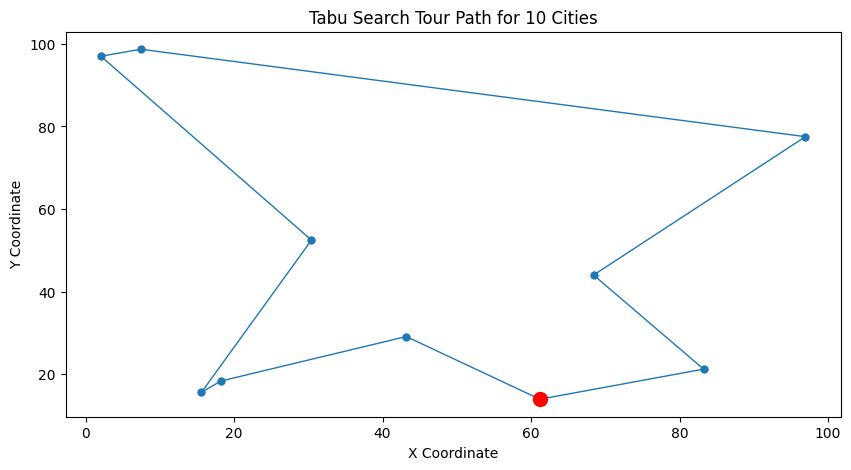

Results for 20 cities:
Tabu Search - Cost: 345.79, Time: 8.07 seconds
First City: City_28, Last City: City_17



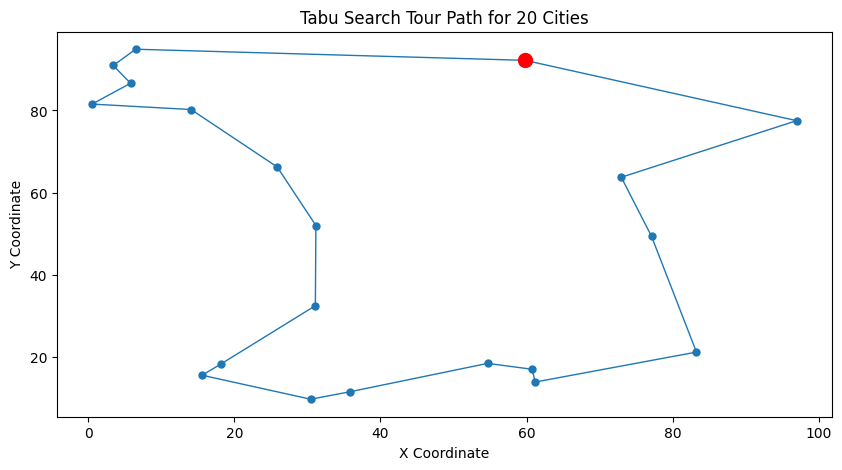

Results for 30 cities:
Tabu Search - Cost: 460.85, Time: 25.64 seconds
First City: City_6, Last City: City_22



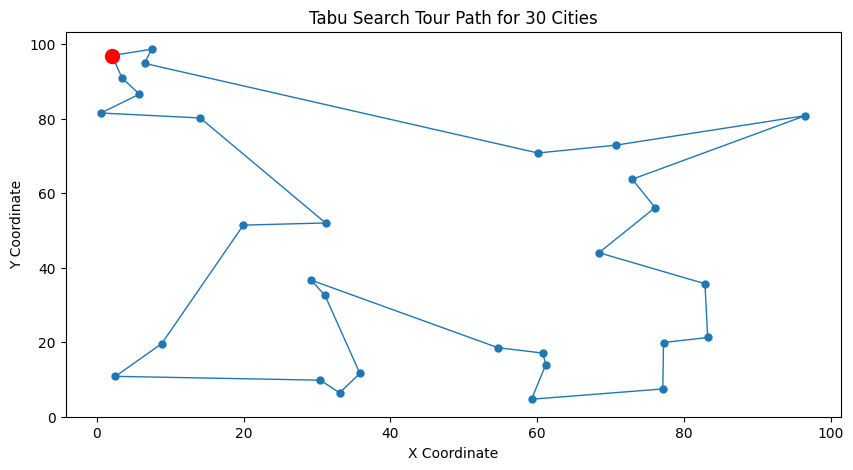

Results for 40 cities:
Tabu Search - Cost: 562.43, Time: 58.49 seconds
First City: City_6, Last City: City_35



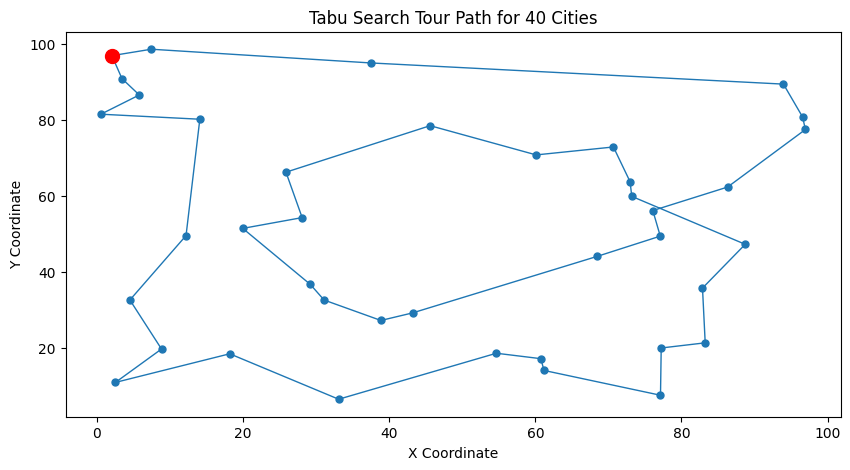

Results for 50 cities:
Tabu Search - Cost: 869.33, Time: 109.48 seconds
First City: City_12, Last City: City_14



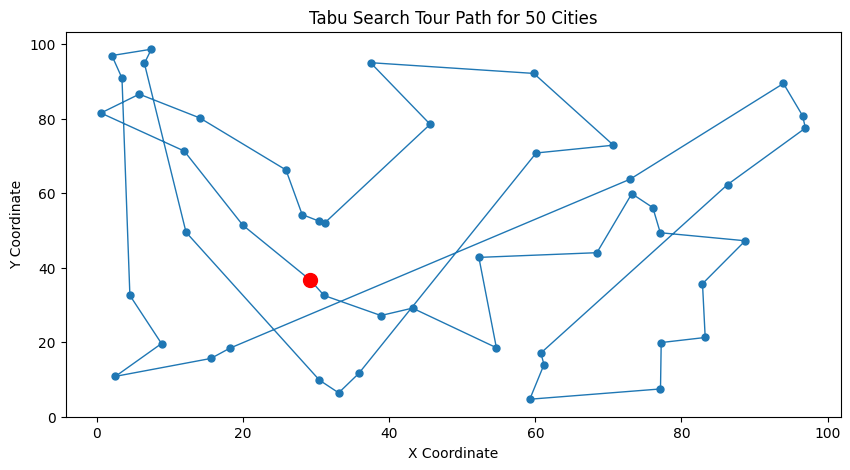

In [19]:
# Function to generate neighbors by swapping pairs of cities
def generate_neighbors(current_solution):
    neighbors = []
    n = len(current_solution)
    for i in range(n):
        for j in range(i + 1, n):
            neighbor = current_solution.copy()
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]  # Swap cities i and j
            neighbors.append(neighbor)  # Add the neighbor solution to the list
    return neighbors

# Function to calculate the total cost of a tour given a distance matrix and a solution
def calculate_tour_cost(distance_matrix, solution):
    return sum([distance_matrix[solution[i], solution[(i+1) % len(solution)]] for i in range(len(solution))])

# Function to find the best neighbor that is not in the tabu list
def best_neighbor(neighbors, tabu_list, distance_matrix):
    best_tour = None
    min_cost = float('inf')
    for neighbor in neighbors:
        if str(neighbor.tolist()) not in tabu_list:  # Check if the neighbor is not in the tabu list
            cost = calculate_tour_cost(distance_matrix, neighbor)
            if cost < min_cost:  # Find the neighbor with the minimum cost
                min_cost = cost
                best_tour = neighbor
    return best_tour, min_cost

# Function to update the tabu list by adding the current solution and removing the oldest solution if necessary
def update_tabu_list(tabu_list, solution, tabu_size):
    if len(tabu_list) >= tabu_size:
        tabu_list.pop(0)  # Remove the oldest solution if the list exceeds the size limit
    tabu_list.append(str(solution.tolist()))  # Add the current solution to the list

# Main function for the tabu search algorithm
def tabu_search(distance_matrix, num_iterations, tabu_size, num_cities):
    current_solution = np.random.permutation(num_cities)  # Start with a random initial solution
    best_solution = current_solution.copy()
    best_cost = calculate_tour_cost(distance_matrix, current_solution)

    tabu_list = []  # Initialize an empty tabu list

    for _ in range(num_iterations):  # Iterate for the given number of iterations
        neighbors = generate_neighbors(current_solution)  # Generate neighbors of the current solution
        current_solution, current_cost = best_neighbor(neighbors, tabu_list, distance_matrix)  # Find the best neighbor
        
        if current_cost < best_cost:  # If the new solution is better, update the best solution
            best_solution = current_solution.copy()
            best_cost = current_cost
        
        update_tabu_list(tabu_list, current_solution, tabu_size)  # Update the tabu list with the current solution

    return best_solution, best_cost  # Return the best solution and its cost

# Function to plot the tour of the cities given the solution
def plot_tour(cities, solution, title):
    plt.figure(figsize=(10, 5))
    tour = np.append(solution, solution[0])  # Make the tour circular by adding the first city to the end
    plt.plot(cities.iloc[tour]['X'], cities.iloc[tour]['Y'], 'o-', markersize=5, linewidth=1)  # Plot the tour path
    start = solution[0]
    end = solution[-1]
    plt.plot(cities.iloc[start]['X'], cities.iloc[start]['Y'], 'ro', markersize=10)  # Mark the starting city with a red dot
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()  # Display the plot

# Function to run the experiment for different subsets of cities
def run_experiment(cities, distance_matrix, num_cities):
    subset = np.random.choice(len(cities), num_cities, replace=False)  # Randomly select a subset of cities
    subset_distance_matrix = distance_matrix[subset][:, subset]  # Extract the distance matrix for the selected cities

    start_time = time.time()  # Start the timer for the experiment
    ts_solution, ts_cost = tabu_search(subset_distance_matrix, 1000, 100, num_cities)  # Run the tabu search algorithm
    ts_time = time.time() - start_time  # Calculate the time taken for the experiment

    # Get the names of the first and last cities in the solution
    start_city = cities.iloc[subset].iloc[ts_solution[0]]['City']
    end_city = cities.iloc[subset].iloc[ts_solution[-1]]['City']

    print(f"Results for {num_cities} cities:")
    print(f"Tabu Search - Cost: {ts_cost:.2f}, Time: {ts_time:.2f} seconds")
    print(f"First City: {start_city}, Last City: {end_city}\n")

    plot_tour(cities.iloc[subset], ts_solution, f'Tabu Search Tour Path for {num_cities} Cities')  # Plot the solution

# Run experiments for different numbers of cities
for city_count in [10, 20, 30, 40, 50]:
    run_experiment(cities, dist_matrix, city_count)


### 4.2 Population-based Search Algorithm (Genetic Algorithm)

The Genetic Algorithm (GA) is a powerful tool for solving complex optimization problems like the Traveling Salesman Problem (TSP). Inspired by biological evolution, GA uses a population of candidate solutions, iteratively improving them through selection, crossover, and mutation.

Results for 10 cities:
Genetic Algorithm - Cost: 399.94, Time: 1.36 seconds
First City: City_27, Last City: City_18



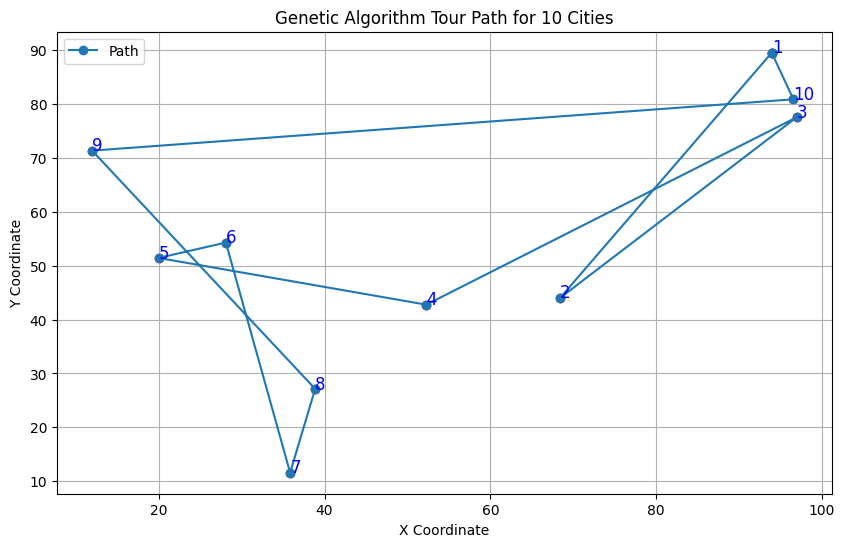

Results for 20 cities:
Genetic Algorithm - Cost: 803.60, Time: 1.45 seconds
First City: City_19, Last City: City_46



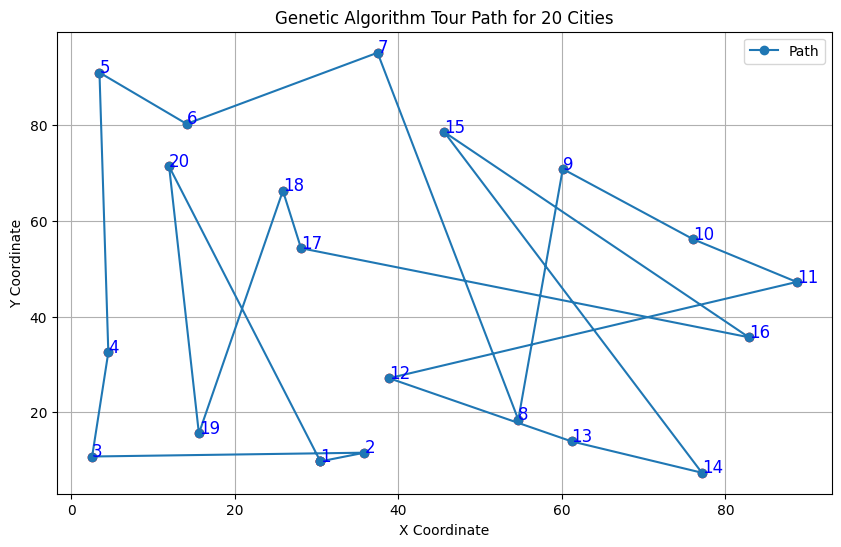

Results for 30 cities:
Genetic Algorithm - Cost: 1393.74, Time: 1.52 seconds
First City: City_50, Last City: City_19



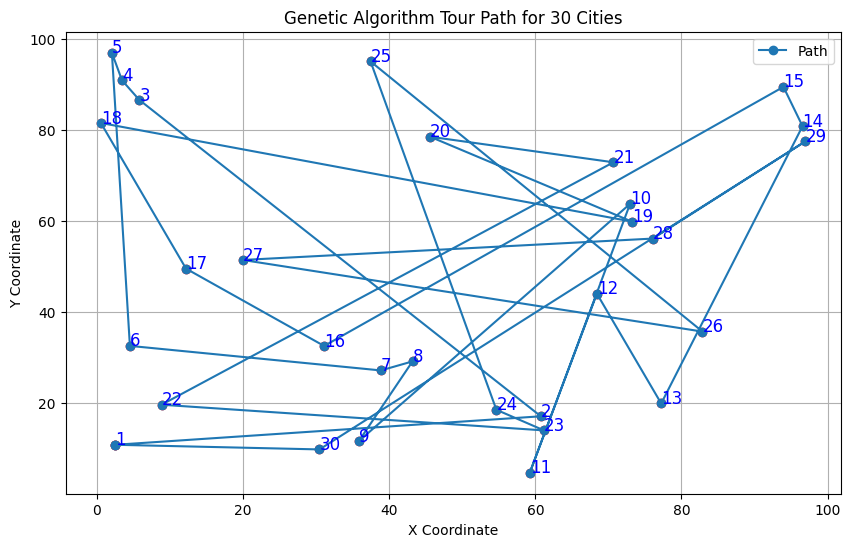

Results for 40 cities:
Genetic Algorithm - Cost: 1864.56, Time: 1.53 seconds
First City: City_17, Last City: City_3



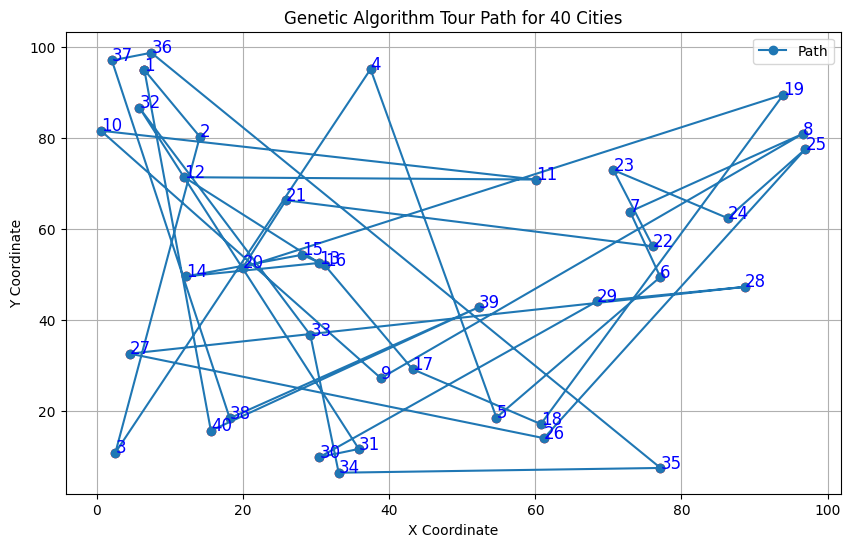

Results for 50 cities:
Genetic Algorithm - Cost: 2463.54, Time: 1.60 seconds
First City: City_34, Last City: City_27



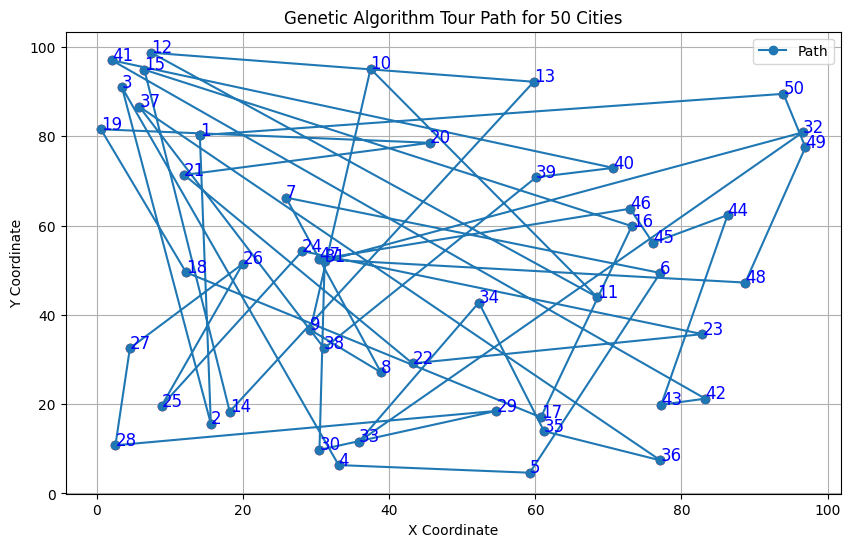

In [20]:
# Generate random initial population of solutions (permutations of cities)
def generate_population(pop_size, num_cities):
    population = [np.random.permutation(num_cities) for _ in range(pop_size)]
    return population

# Calculate the total cost of a tour (sum of distances between consecutive cities)
def calculate_tour_cost(distance_matrix, solution):
    return sum([distance_matrix[solution[i], solution[(i+1) % len(solution)]] for i in range(len(solution))])

# Select parents based on fitness (inverse of cost)
def select_parents(population, fitness_scores):
    fitness_scores = np.array(fitness_scores)
    probs = 1 / (fitness_scores + 1)  # Inverse of cost to get higher probability for better solutions
    probs /= probs.sum()  # Normalize probabilities to sum to 1
    parents_indices = np.random.choice(len(population), size=2, p=probs, replace=False)  # Random selection
    return population[parents_indices[0]], population[parents_indices[1]]

# Crossover function (one-point crossover to generate offspring)
def crossover(parent1, parent2, num_cities):
    cut = np.random.randint(1, num_cities)  # Random crossover point
    child1 = np.concatenate([parent1[:cut], parent2[cut:]])  # Combine parts from both parents
    child2 = np.concatenate([parent2[:cut], parent1[cut:]])
    child1, child2 = fix_duplicates(child1, child2, num_cities)  # Ensure no duplicates
    return child1, child2

# Mutation function (simple swap mutation to explore new solutions)
def mutate(child, num_cities):
    i, j = np.random.choice(range(num_cities), 2, replace=False)  # Randomly select two cities to swap
    child[i], child[j] = child[j], child[i]
    return child

# Fix duplicates in the children generated by crossover
def fix_duplicates(child1, child2, num_cities):
    for child in [child1, child2]:
        unique, counts = np.unique(child, return_counts=True)  # Identify duplicates
        duplicates = unique[counts > 1]
        missing = np.setdiff1d(np.arange(num_cities), unique, assume_unique=True)  # Identify missing cities
        np.random.shuffle(missing)
        replace_dict = dict(zip(duplicates, missing))  # Map duplicates to missing cities
        for d in duplicates:
            indices = np.where(child == d)[0]
            child[indices[1:]] = [replace_dict[d] for _ in indices[1:]]  # Replace duplicates
    return child1, child2

# Main genetic algorithm function to evolve the population
def genetic_algorithm(distance_matrix, population_size, num_generations, num_cities):
    population = generate_population(population_size, num_cities)  # Initialize population
    fitness_scores = [calculate_tour_cost(distance_matrix, individual) for individual in population]  # Evaluate initial population

    for _ in range(num_generations):
        parents = []
        for _ in range(population_size // 2):  # Perform crossover and mutation for half the population
            parent1, parent2 = select_parents(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2, num_cities)
            child1 = mutate(child1, num_cities)
            child2 = mutate(child2, num_cities)
            parents.extend([child1, child2])  # Add the children to the next generation

        # Evaluate new population
        fitness_scores = [calculate_tour_cost(distance_matrix, individual) for individual in parents]
        population = parents  # Replace old population with new generation

    best_index = np.argmin(fitness_scores)  # Find the best solution in the final generation
    return population[best_index], fitness_scores[best_index]

# Function to plot the tour path on a graph
def plot_tour(cities, solution, title='Tour Path'):
    ordered_cities = cities.iloc[solution]
    coordinates = ordered_cities[['X', 'Y']].values
    coordinates = np.vstack([coordinates, coordinates[0]])  # Close the loop by repeating the first city
    
    plt.figure(figsize=(10, 6))
    plt.plot(coordinates[:, 0], coordinates[:, 1], 'o-', label='Path')  # Plot the tour path
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='red')  # Mark cities
    for i, (x, y) in enumerate(coordinates[:-1], start=1):
        plt.text(x, y, str(i), color="blue", fontsize=12)  # Annotate city numbers

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.legend()
    plt.show()

# Function to run the experiment for different city sizes
def run_experiment(cities, distance_matrix, subsets):
    for size, subset in subsets.items():
        subset_distance_matrix = distance_matrix[subset][:, subset]  # Extract distance matrix for the subset of cities

        start_time = time.time()
        ga_solution, ga_cost = genetic_algorithm(subset_distance_matrix, population_size=20, num_generations=100, num_cities=size)
        ga_time = time.time() - start_time  # Measure execution time

        # Get names of the first and last cities in the tour
        start_city = cities.iloc[subset].iloc[ga_solution[0]]['City']
        end_city = cities.iloc[subset].iloc[ga_solution[-1]]['City']

        print(f"Results for {size} cities:")
        print(f"Genetic Algorithm - Cost: {ga_cost:.2f}, Time: {ga_time:.2f} seconds")
        print(f"First City: {start_city}, Last City: {end_city}\n")

        plot_tour(cities.iloc[subset], ga_solution, f'Genetic Algorithm Tour Path for {size} Cities')

# Create subsets of cities for consistent testing across algorithms
def create_city_subsets(cities, sizes):
    np.random.seed(42)  # Fix the seed for reproducibility
    city_indices = np.arange(len(cities))
    subsets = {}
    for size in sizes:
        subsets[size] = np.random.choice(city_indices, size, replace=False)  # Randomly sample city indices
    return subsets

# Main execution block
dist_matrix = calculate_distance_matrix(cities)  # Calculate distance matrix for all cities
sizes = [10, 20, 30, 40, 50]  # Different city sizes for testing
subsets = create_city_subsets(cities, sizes)  # Create city subsets for each size
run_experiment(cities, dist_matrix, subsets)  # Run experiments


## Section 5: Hyperparameter Tuning for Both Models

This section focuses on optimizing the performance of the Tabu Search and Genetic Algorithm by fine-tuning their hyperparameters. Properly adjusted parameters, like the mutation rate in GA or Tabu list tenure in Tabu Search, can significantly enhance the efficiency and quality of the solutions.

### 5.1 Enhanced Tabu Search

Running Tabu Search for 10 cities...
Best Cost for 10 cities: 232.98
Time taken: 1.54 seconds


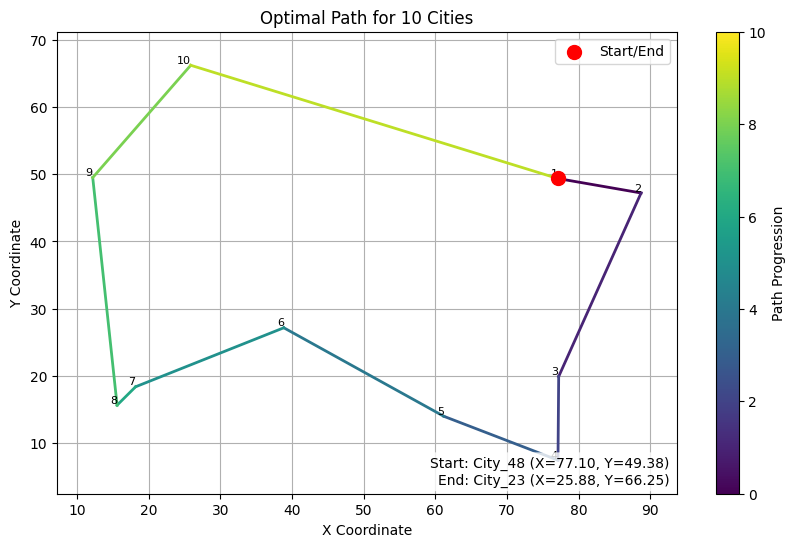


Running Tabu Search for 20 cities...
Best Cost for 20 cities: 545.11
Time taken: 13.63 seconds


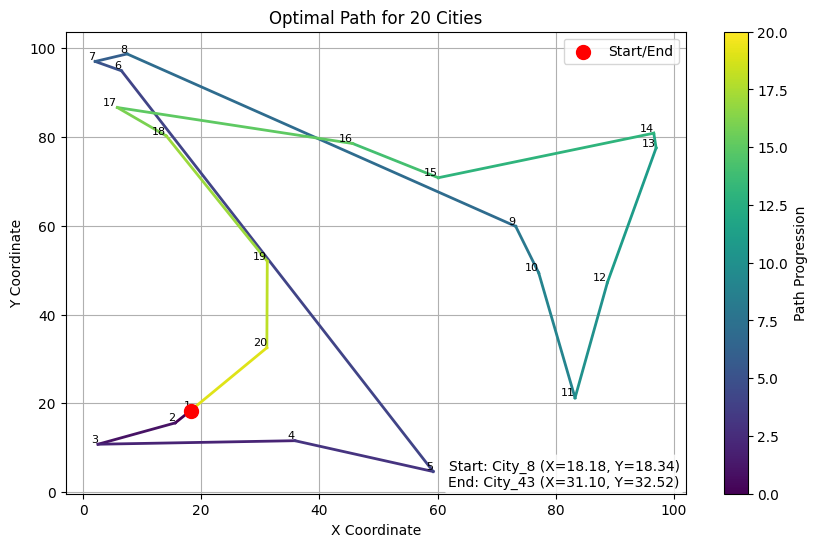


Running Tabu Search for 30 cities...
Best Cost for 30 cities: 605.90
Time taken: 46.02 seconds


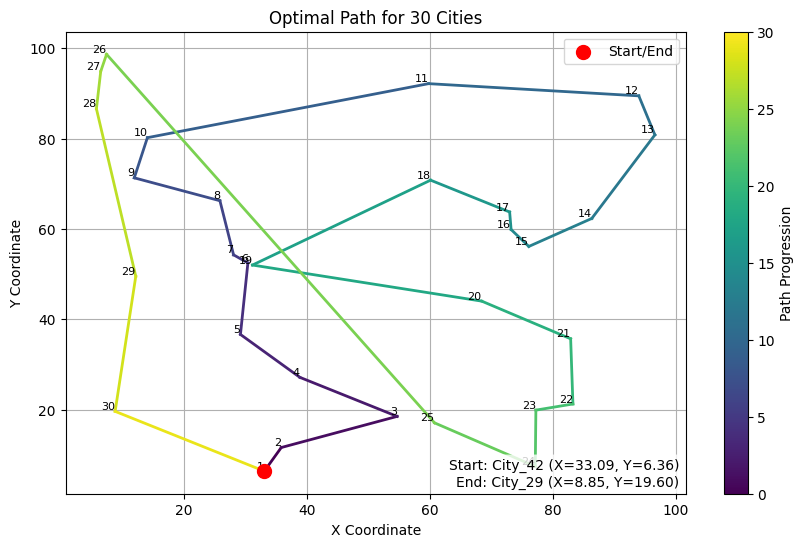


Running Tabu Search for 40 cities...
Best Cost for 40 cities: 653.17
Time taken: 108.30 seconds


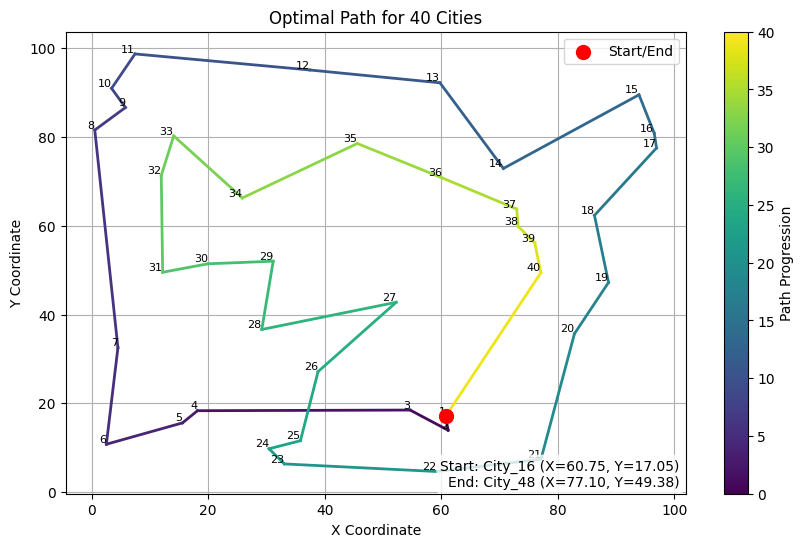


Running Tabu Search for 50 cities...
Best Cost for 50 cities: 690.65
Time taken: 226.96 seconds


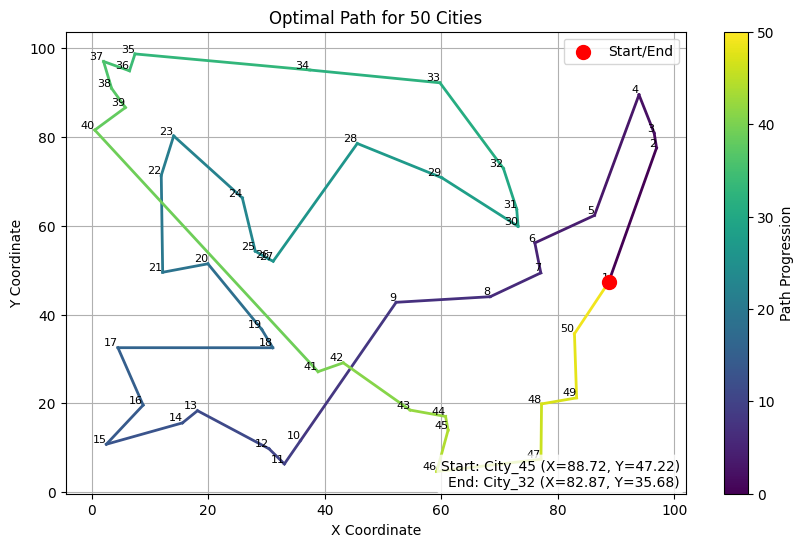

In [197]:
def load_cities(file_path):
    # Load city data from a CSV file.
    cities_data = pd.read_csv(file_path)
    return cities_data[['City', 'X', 'Y']].to_dict('records')

def calculate_tour_cost(tour):
    # Calculate the total distance of a given tour, ensuring it's circular.
    total_distance = 0
    number_of_cities = len(tour)
    for i in range(number_of_cities):
        next_index = (i + 1) % number_of_cities
        city1, city2 = tour[i], tour[next_index]
        distance = math.sqrt((city1['X'] - city2['X']) ** 2 + (city1['Y'] - city2['Y']) ** 2)
        total_distance += distance
    return total_distance

def generate_neighbors(current_tour):
    # Generate neighbor tours by swapping two cities in the current tour.
    neighbors = []
    tour_length = len(current_tour)
    for i in range(tour_length):
        for j in range(i + 1, tour_length):
            neighbor = current_tour[:]
            neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
            neighbors.append(neighbor)
    return neighbors

def best_neighbor(neighbors, tabu_list, best_cost):
    # Select the best neighbor that isn't in the tabu list and has a better cost.
    best_tour = None
    min_cost = float('inf')
    for neighbor in neighbors:
        neighbor_key = str(neighbor)  # Convert tour list to string to use as a key
        if neighbor_key not in tabu_list:
            cost = calculate_tour_cost(neighbor)
            if cost < min_cost:
                min_cost = cost
                best_tour = neighbor
    return best_tour, min_cost

def update_tabu_list(tabu_list, move, tabu_size):
    # Update the tabu list by adding new moves and removing the oldest if necessary.
    tabu_list.append(str(move))  # Use string representation to track tours
    if len(tabu_list) > tabu_size:
        tabu_list.pop(0)

def tabu_search(cities, iterations, tabu_size):
    # Perform Tabu Search to find the shortest tour.
    current_tour = cities[:]
    random.shuffle(current_tour)
    best_tour = current_tour[:]
    best_cost = calculate_tour_cost(best_tour)
    tabu_list = []
    costs = []  # Store costs for plotting

    for i in range(iterations):
        neighbors = generate_neighbors(current_tour)
        current_tour, current_cost = best_neighbor(neighbors, tabu_list, best_cost)
        
        if current_cost < best_cost:
            best_tour = current_tour[:]
            best_cost = current_cost
            costs.append(best_cost)  # Record improvements for plotting

        update_tabu_list(tabu_list, current_tour, tabu_size)

        if (i + 1) % 1000 == 0:
            print(f"Iteration {i+1}: Current best distance: {best_cost}")

    return best_tour, best_cost, costs  # Return tour, cost, and costs for plotting

def plot_tour(cities, tour, title="Optimal Path"):
    # Plot the optimal tour with a gradient path and sequence numbers, and display first/last city info on the bottom-right.
    # Extract coordinates from the tour
    x = [city['X'] for city in tour] + [tour[0]['X']]
    y = [city['Y'] for city in tour] + [tour[0]['Y']]
    
    # Extract first and last city information
    first_city = tour[0]['City']
    last_city = tour[-1]['City']
    first_city_info = f"Start: {first_city} (X={tour[0]['X']:.2f}, Y={tour[0]['Y']:.2f})"
    last_city_info = f"End: {last_city} (X={tour[-1]['X']:.2f}, Y={tour[-1]['Y']:.2f})"
    
    # Create a colormap for the path using the updated method
    norm = plt.Normalize(0, len(tour))
    cmap = plt.colormaps['viridis']  # Updated colormap access method
    
    # Calculate axis limits for consistent sizing
    x_coords = [city['X'] for city in cities]
    y_coords = [city['Y'] for city in cities]
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    padding = 5  # Add padding for better visualization
    
    # Plot the gradient path
    fig, ax = plt.subplots(figsize=(10, 6))
    for i in range(len(tour)):
        ax.plot(x[i:i+2], y[i:i+2], color=cmap(norm(i)), linewidth=2)
    
    # Annotate cities with their sequence numbers
    for i, city in enumerate(tour):
        ax.text(city['X'], city['Y'], f"{i+1}", fontsize=8, ha='right', va='bottom', color='black')
    
    # Highlight start and end points
    ax.scatter(x[0], y[0], c='red', s=100, zorder=5, label="Start/End")
    
    # Add a color bar explicitly associated with the axes
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label("Path Progression")
    
    # Set fixed axis limits for consistent graph size
    ax.set_xlim(x_min - padding, x_max + padding)
    ax.set_ylim(y_min - padding, y_max + padding)
    
    # Add first and last city information at the bottom-right corner
    ax.text(
        x_max + padding - 1, y_min - padding + 1,
        f"{first_city_info}\n{last_city_info}",
        fontsize=10, ha='right', va='bottom', color='black',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
    )
    
    # Add plot details
    ax.set_title(title)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()
    ax.grid(True)
    plt.show()


def run_tabu_experiments(file_path, iterations=500, tabu_size=50, subsets=[10, 20, 30, 40, 50]):
    # Run Tabu Search for different subsets of cities and plot results.
    cities_data = load_cities(file_path)
    for subset_size in subsets:
        subset = random.sample(cities_data, subset_size)
        
        print(f"Running Tabu Search for {subset_size} cities...")
        start_time = time.time()
        best_tour, best_cost, _ = tabu_search(subset, iterations, tabu_size)
        end_time = time.time()
        
        elapsed_time = end_time - start_time
        print(f"Best Cost for {subset_size} cities: {best_cost:.2f}")
        print(f"Time taken: {elapsed_time:.2f} seconds")
        
        # Plot the colorful tour
        plot_tour(subset, best_tour, title=f"Optimal Path for {subset_size} Cities")
        print("")

# Run experiments
run_tabu_experiments('cities.csv')


**Enhanced Tabu Search: Key Modifications**
 
1. **Data Handling**:  
   Converted city data into a list of dictionaries for greater flexibility in manipulation during the search process.

2. **Tour Cost Calculation**:  
   Uses direct mathematical distance calculations, allowing customization for non-Euclidean distances and constraints.

3. **Neighbor Generation**:  
   Retains the basic city-swapping mechanism but offers flexibility for custom neighbor generation strategies.

4. **Best Neighbor Selection**:  
   Uses string representations of tours for faster and more efficient Tabu list lookups.

5. **Tabu List Management**:  
   Introduces dynamic management of the Tabu list, adapting its size based on search progress.

6. **Search Execution**:  
   Randomizes starting solutions and dynamically adjusts parameters, optimizing the search process as it progresses.

7. **Visualization**:  
   Adds color gradients and annotations to improve clarity and interpretation of the tour.

8. **Experimentation and Testing**:  
   Dynamically samples city subsets and tracks detailed performance metrics like execution time and cost trends.

---

### **Why These Changes Were Made**  
These modifications enhance the **flexibility**, **efficiency**, and **scalability** of the algorithm, allowing it to handle more complex datasets and provide clearer, more insightful results.

### 5.2 Enhanced Genetic Algorithm

Cities data loaded successfully.
Running Genetic Algorithm for 10 cities...
Starting Genetic Algorithm...
Generation 50: Best Distance = 339.97942316430743
Best Route for 10 cities: Distance = 339.97942316430743
Time taken: 10.25 seconds


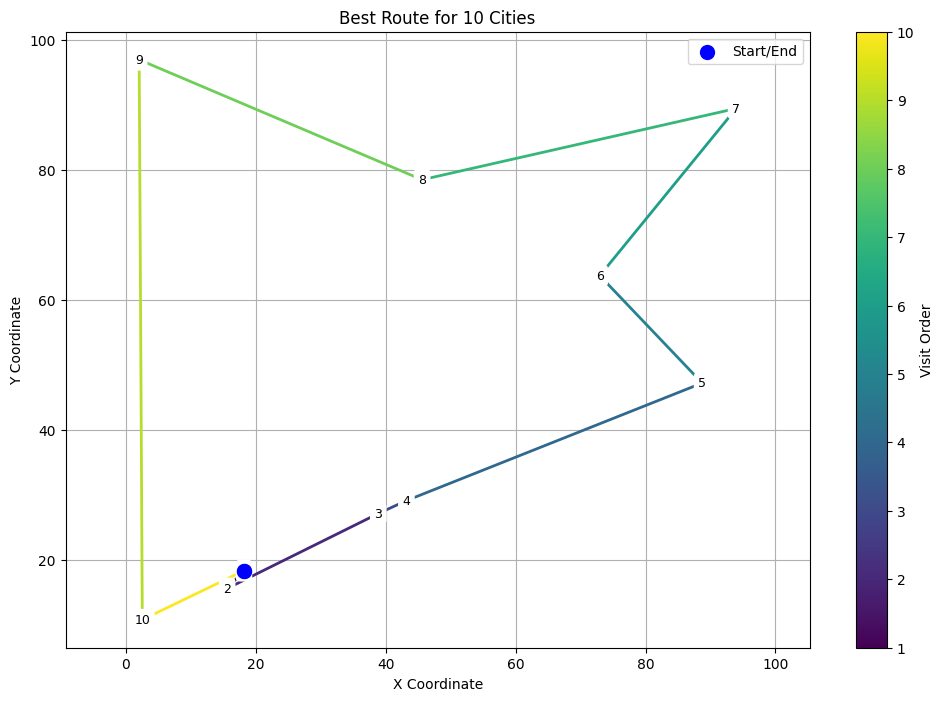

Running Genetic Algorithm for 20 cities...
Starting Genetic Algorithm...
Generation 50: Best Distance = 375.580841530122
Best Route for 20 cities: Distance = 375.580841530122
Time taken: 47.35 seconds


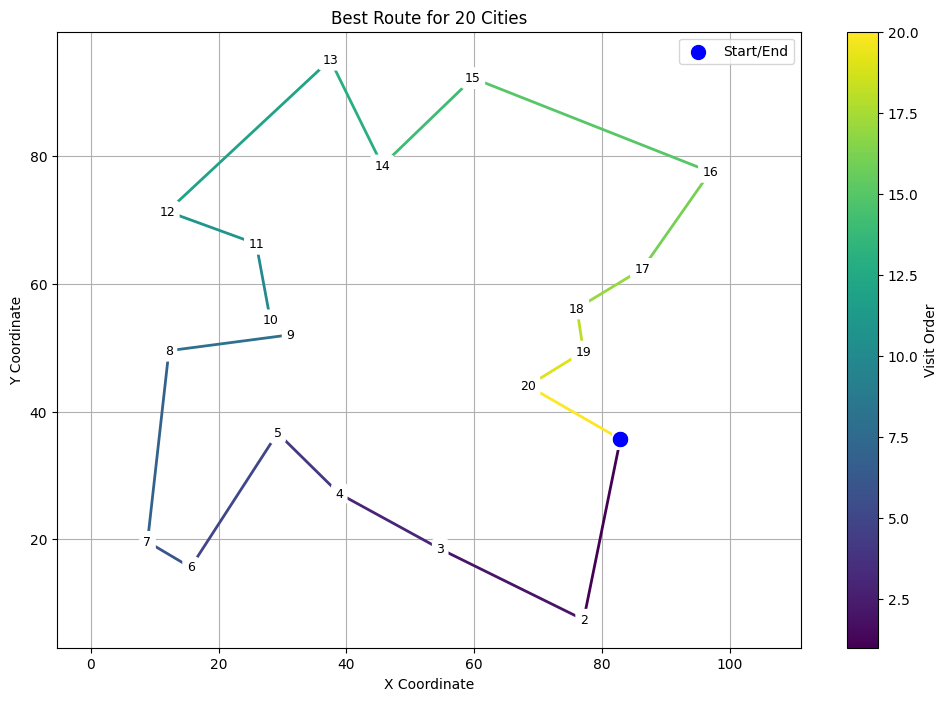

Running Genetic Algorithm for 30 cities...
Starting Genetic Algorithm...
Generation 50: Best Distance = 495.3380423840138
Best Route for 30 cities: Distance = 495.3380423840138
Time taken: 112.28 seconds


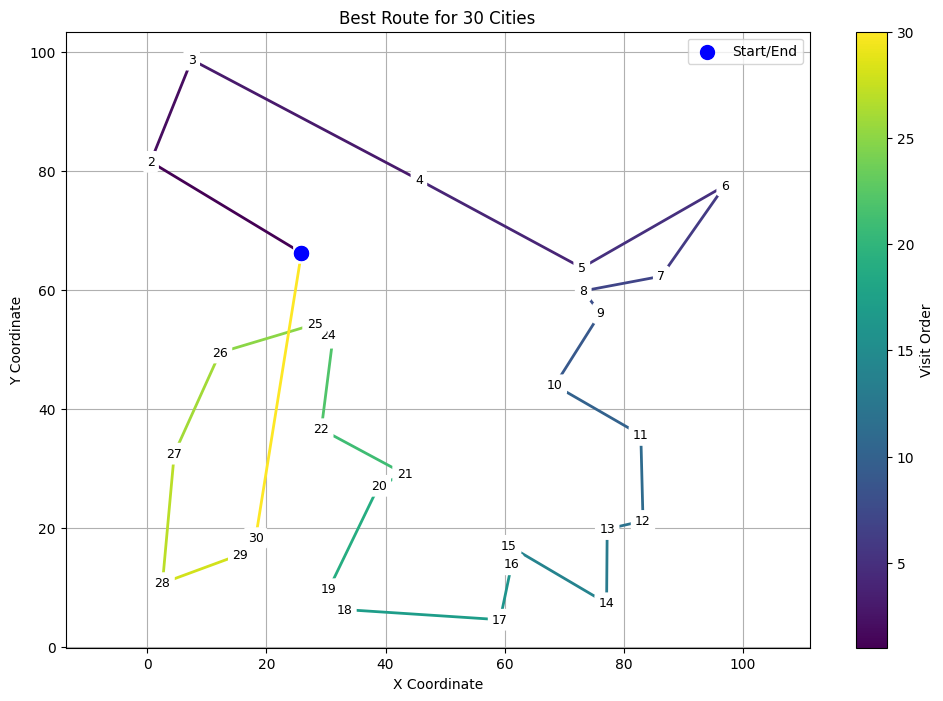

Running Genetic Algorithm for 40 cities...
Starting Genetic Algorithm...
Generation 50: Best Distance = 493.4947423918049
Best Route for 40 cities: Distance = 493.4947423918049
Time taken: 201.28 seconds


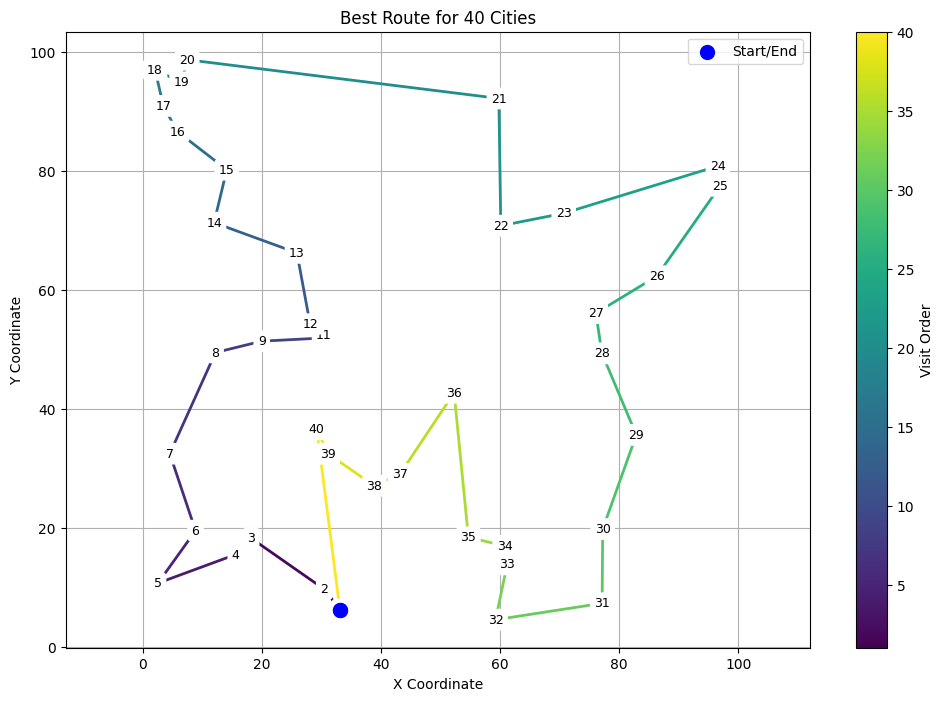

Running Genetic Algorithm for 50 cities...
Starting Genetic Algorithm...
Generation 50: Best Distance = 594.1068113148192
Best Route for 50 cities: Distance = 594.1068113148192
Time taken: 326.81 seconds


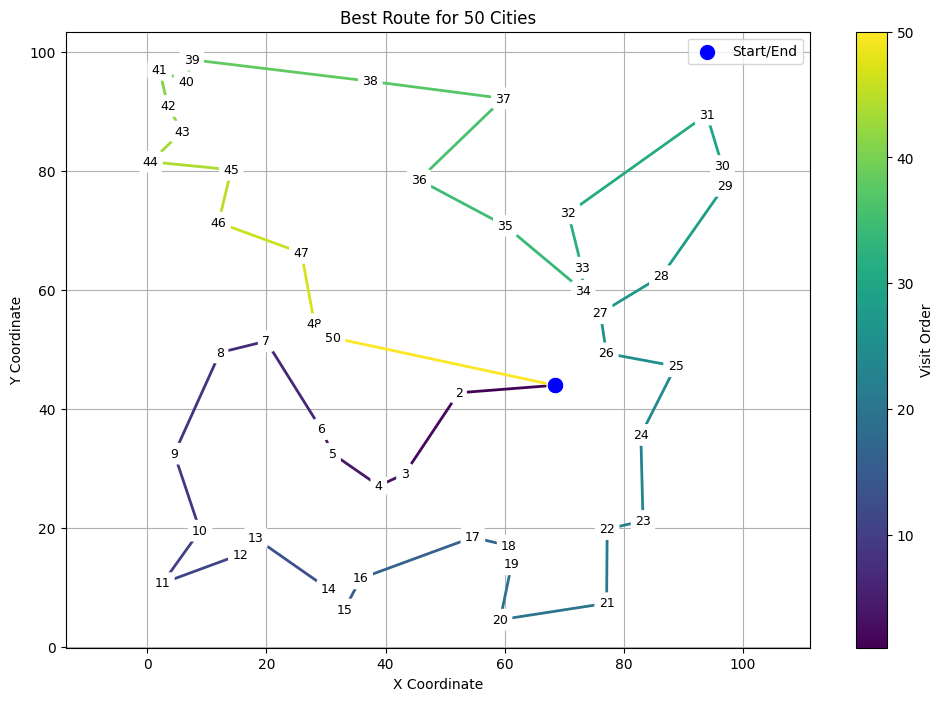

In [149]:
def calculate_total_distance(cities, route):
    # Calculate the total distance of a route
    route_coordinates = cities[route]
    distances = np.sqrt(np.sum(np.diff(route_coordinates, axis=0)**2, axis=1))
    total_distance = np.sum(distances) + np.linalg.norm(route_coordinates[0] - route_coordinates[-1])
    return total_distance

def initialize_population(num_cities, population_size):
    # Generate initial population of random routes
    return [np.random.permutation(num_cities) for _ in range(population_size)]

def rank_population(cities, population):
    # Rank the population by fitness (lower distance is better)
    return sorted(((i, calculate_total_distance(cities, route)) for i, route in enumerate(population)), key=lambda x: x[1])

def select_parents(ranked_population, population, elite_size, tournament_size=5):
    # Select parents using elitism and tournament selection
    elite_indices = [idx for idx, score in ranked_population[:elite_size]]
    elite = [population[i] for i in elite_indices]
    selection = elite[:]
    while len(selection) < len(population):
        tournament = random.sample(ranked_population, tournament_size)
        winner = min(tournament, key=lambda x: x[1])
        selection.append(population[winner[0]])
    return selection

def crossover(parent1, parent2):
    # Crossover - Partially Mapped Crossover (PMX)
    size = len(parent1)
    child = np.empty(size, dtype=parent1.dtype)
    start, stop = sorted(random.sample(range(size), 2))
    child[start:stop] = parent1[start:stop]
    remaining = [item for item in parent2 if item not in child[start:stop]]
    child[:start] = remaining[:start]
    child[stop:] = remaining[start:]
    return child

def mutate(route, mutation_rate):
    # Mutation - Swap Mutation with diversification
    route = route.copy()
    for _ in range(int(len(route) * mutation_rate)):
        swap_idx1, swap_idx2 = np.random.randint(0, len(route), 2)
        route[swap_idx1], route[swap_idx2] = route[swap_idx2], route[swap_idx1]
    return route

def two_opt(route, cities):
    # 2-opt local search to improve the route by swapping segments
    best = route
    best_distance = calculate_total_distance(cities, best)
    for i in range(1, len(route) - 1):
        for j in range(i + 1, len(route)):
            new_route = np.concatenate((route[:i], route[i:j][::-1], route[j:]))
            new_distance = calculate_total_distance(cities, new_route)
            if new_distance < best_distance:
                best = new_route
                best_distance = new_distance
    return best

def evolve_population(cities, population, mutation_rate, elite_size, use_two_opt=False):
    # Evolve the population over generations
    ranked_population = rank_population(cities, population)
    parents = select_parents(ranked_population, population, elite_size)
    children = []
    for _ in range(len(population) - len(parents)):
        parent1, parent2 = random.sample(parents, 2)
        child = crossover(parent1, parent2)
        children.append(mutate(child, mutation_rate))
    next_generation = parents + children

    if use_two_opt:
        for i in range(len(next_generation)):
            next_generation[i] = two_opt(next_generation[i], cities)

    return next_generation

def genetic_algorithm(cities, population_size, generations, mutation_rate, elite_size, print_interval=50, use_two_opt=True):
    # Run Genetic Algorithm
    population = initialize_population(len(cities), population_size)
    best_route = None
    best_distance = float('inf')

    print("Starting Genetic Algorithm...")
    for generation in range(generations):
        population = evolve_population(cities, population, mutation_rate, elite_size, use_two_opt)

        # Evaluate best solution
        ranked_population = rank_population(cities, population)
        current_best_distance = ranked_population[0][1]

        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_route = population[ranked_population[0][0]]

        if (generation + 1) % print_interval == 0 or generation == generations - 1:
            print(f"Generation {generation + 1}: Best Distance = {current_best_distance}")

    return best_route, best_distance

def plot_route(cities, route, title="Optimal TSP Route"):
    # Plot the best route found by the genetic algorithm with improved aesthetics and correct city information.
    fig, ax = plt.subplots(figsize=(12, 8))  # Create a figure and axes.
    
    # Extract the coordinates for the route
    x = [cities[route[i], 0] for i in range(len(route))] + [cities[route[0], 0]]
    y = [cities[route[i], 1] for i in range(len(route))] + [cities[route[0], 1]]
    
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(1, len(route))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    # Color the points differently along the path
    for i in range(len(x) - 1):
        ax.plot(x[i:i+2], y[i:i+2], 'o-', color=sm.to_rgba(i+1), linewidth=2, markersize=5)
        ax.text(
            x[i], y[i], f'{i+1}',  # Include only the sequence number
            color='black', fontsize=9, ha='center', va='center',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.35')
        )

    # Mark the start and end points distinctly
    ax.scatter(x[0], y[0], c='blue', s=100, zorder=5, label='Start/End')
    ax.scatter(x[-1], y[-1], c='blue', s=100, zorder=5)  # Same as start in a loop
    
    x_min, x_max = min(x), max(x)
    y_min, y_max = min(y), max(y)
    padding = 5  # Add padding for better visualization

    # Add a color bar
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Visit Order')

    # Setup plot details
    ax.set_title(title)
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.legend(loc='upper right')
    ax.grid(True)
    ax.axis('equal')  # Set equal scaling by changing axis limits
    plt.show()

if __name__ == "__main__":
    # Parameters
    population_size = 50
    generations = 50
    mutation_rate = 0.3
    elite_size = 10
    city_sizes = [10, 20, 30, 40, 50]

    try:
        # Load cities from CSV file
        cities_data = pd.read_csv('cities.csv')
        print("Cities data loaded successfully.")

        # Prepare city subsets for specified sizes
        cities = cities_data[['X', 'Y']].to_numpy()
        subsets = {size: cities[np.random.choice(len(cities), size, replace=False)] for size in city_sizes}

        # Run Genetic Algorithm for each subset and measure the execution time
        results = {}
        times = {}
        for size, subset in subsets.items():
            print(f"Running Genetic Algorithm for {size} cities...")
            start_time = time.time()  # Start timing here
            best_route, best_distance = genetic_algorithm(
                subset, population_size, generations, mutation_rate, elite_size, print_interval=100, use_two_opt=True
            )
            end_time = time.time()  # End timing here
            total_time = end_time - start_time
            times[size] = total_time

            results[size] = (best_route, best_distance)
            print(f"Best Route for {size} cities: Distance = {best_distance}")
            print(f"Time taken: {total_time:.2f} seconds")
            
            # Plot the best route
            plot_route(subset, best_route, title=f"Best Route for {size} Cities")

    except Exception as e:
        print(f"Error during Genetic Algorithm: {e}")


**Modifications in the Enhanced Genetic Algorithm**

1. **Route Calculation**  
   The **Enhanced GA** calculates distances dynamically using vectorized operations on city coordinates, making it more memory-efficient compared to the **Normal GA**, which relies on a `distance_matrix`.

2. **Population Initialization**  
   In the **Enhanced GA**, population initialization is handled by a dedicated function, ensuring modularity and the potential for future customization. This improves on the **Normal GA**, where random permutations are generated without structure.

3. **Fitness Ranking and Parent Selection**  
   The **Enhanced GA** incorporates explicit fitness ranking and uses tournament selection with elitism, which maintains diversity while promoting strong candidates. The **Normal GA** uses less structured selection, which could affect solution quality.

4. **Crossover Mechanism**  
   The **Enhanced GA** employs Partially Mapped Crossover (PMX), which preserves the relative order of cities, making offspring more meaningful for TSP solutions. The **Normal GA** uses a simpler one-point crossover, which may lose city order.

5. **Mutation Mechanism**  
   The **Enhanced GA** applies swap mutations at a defined rate to promote diversity and avoid premature convergence. In contrast, the **Normal GA** has minimal mutation logic.

6. **Local Search Integration**  
   The **Enhanced GA** integrates a 2-opt local search to improve routes by swapping segments, reducing overall distance. The **Normal GA** relies solely on genetic operations without any local search.

7. **Visualization and Analysis**  
   The **Enhanced GA** improves visualizations by adding color gradients, annotations, and a color bar to represent tour progression, enhancing clarity and interpretability. The **Normal GA** provides basic plots with minimal styling.

8. **Execution Framework**  
   The **Enhanced GA** features a dynamic execution framework, with progress updates, error handling, and flexibility for iterative testing. The **Normal GA** operates within a fixed experimental setup.

---

### **Rationale for Enhancements**

These modifications in the **Enhanced GA** provide:
- **Better Solution Quality**: Advanced crossover (PMX) and local search (2-opt) produce more refined solutions.
- **Efficiency**: Dynamic distance calculations and optimized population management reduce overhead.
- **Improved Usability**: The algorithm’s flexibility, along with better visualizations and progress tracking, makes it easier to interpret and use.

These enhancements allow the **Enhanced GA** to better handle complex optimization problems like TSP, ensuring high-quality solutions and actionable insights.

## Section 6: Comparing and Analysis of Results from Normal and Enhanced Algorithms

### 6.1 Creating a DataFrame comparing Normal and Enhanced Algorithms

In [169]:
# Define function to create comparison DataFrame
def create_comparison_df(data, algorithm_type):
    comparison = data[data['Algorithm_Type'] == algorithm_type].pivot(
        index='Num_Cities', columns='Algorithm_Version', values=['Best_Cost', 'Time_Taken'])
    comparison.columns = [f"{metric}_{version}" for metric, version in comparison.columns]
    return comparison.reset_index()

# Create DataFrames for Tabu Search and Genetic Algorithm comparisons
tabu_comparison = create_comparison_df(reordered_results_df, 'Tabu Search')
ga_comparison = create_comparison_df(reordered_results_df, 'Genetic Algorithm')


### **Tabu Search Comparison**

The table below compares the **Average Best Cost** and **Average Time Taken** for the **Enhanced** and **Normal** versions of the **Tabu Search** algorithm across different numbers of cities.

| **Num Cities** | **Average Best Cost (Enhanced)** | **Average Best Cost (Normal)** | **Average Time Taken (Enhanced)** | **Average Time Taken (Normal)** |
|----------------|----------------------------------|--------------------------------|-----------------------------------|---------------------------------|
| 10             | 232.98                           | 273.54                         | 1.54                              | 1.08                            |
| 20             | 545.11                           | 416.41                         | 13.63                             | 8.46                            |
| 30             | 605.90                           | 557.08                         | 46.02                             | 25.46                           |
| 40             | 653.17                           | 610.06                         | 108.30                            | 60.58                           |
| 50             | 690.65                           | 811.80                         | 226.96                            | 116.85                          |

---

### **Genetic Algorithm Comparison**

The table below compares the **Average Best Cost** and **Average Time Taken** for the **Enhanced** and **Normal** versions of the **Genetic Algorithm** across different numbers of cities.

| **Num Cities** | **Average Best Cost (Enhanced)** | **Average Best Cost (Normal)** | **Average Time Taken (Enhanced)** | **Average Time Taken (Normal)** |
|----------------|----------------------------------|--------------------------------|-----------------------------------|---------------------------------|
| 10             | 278.57                           | 266.42                         | 8.42                              | 0.78                            |
| 20             | 464.22                           | 785.46                         | 43.34                             | 1.42                            |
| 30             | 441.00                           | 1333.76                        | 108.67                            | 1.83                            |
| 40             | 587.10                           | 1753.64                        | 201.80                            | 2.37                            |
| 50             | 612.29                           | 2138.43                        | 336.33                            | 2.62                            |

### 6.2 Visualizing the Results

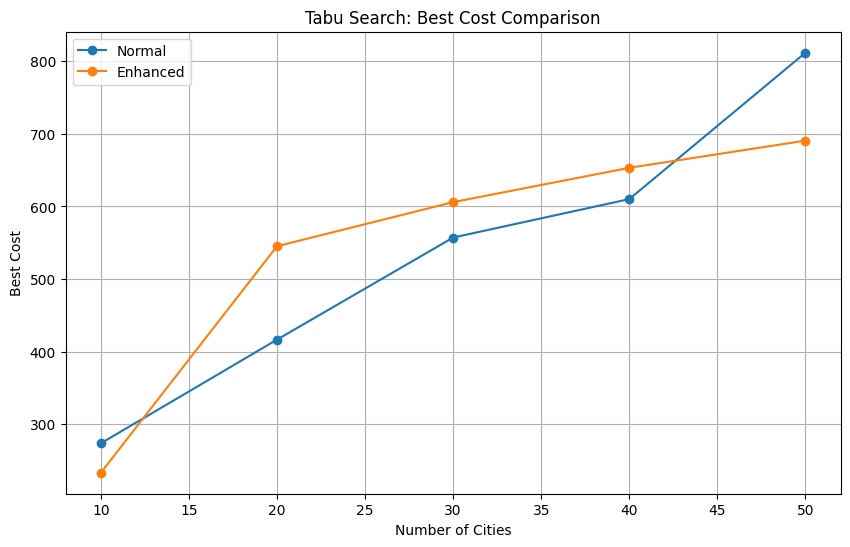

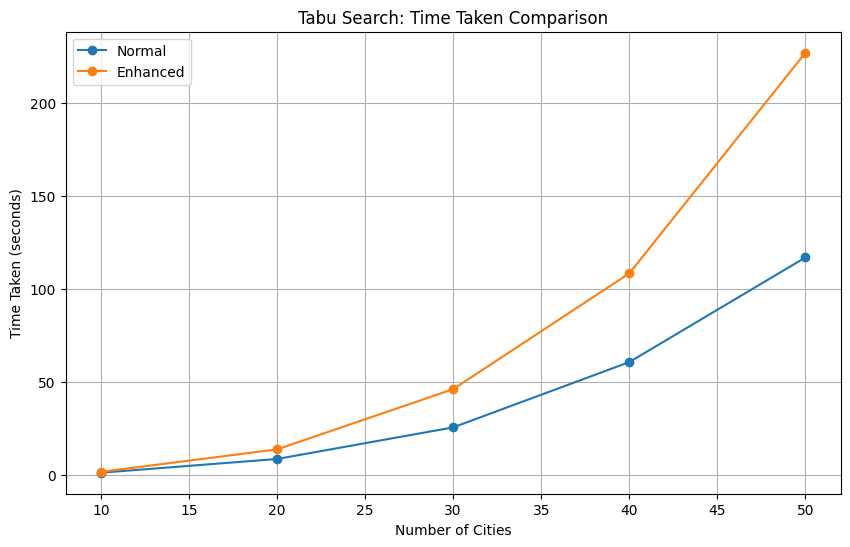

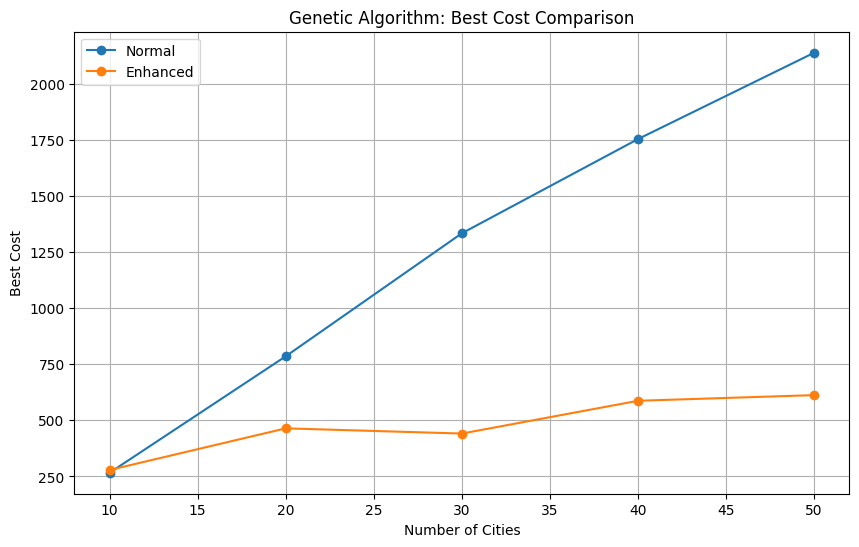

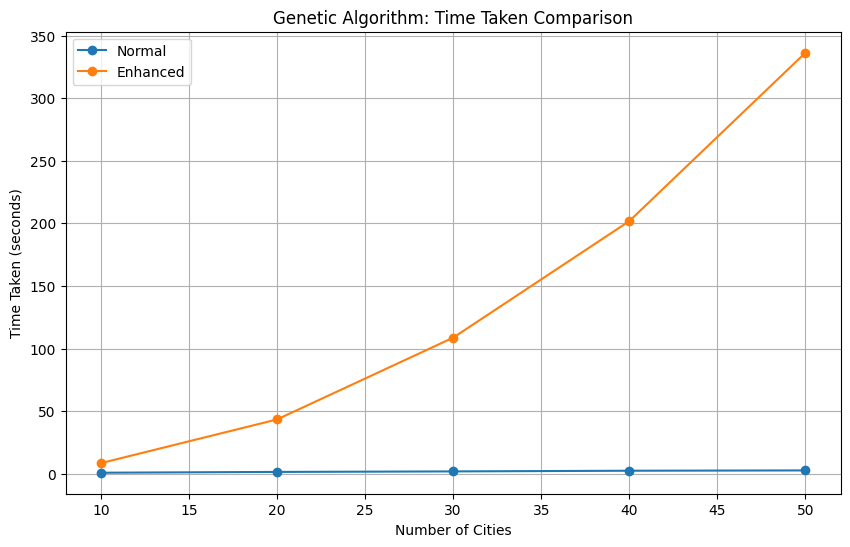

In [162]:
# Visualization for Tabu Search Comparison
fig, ax1 = plt.subplots(figsize=(10, 6))
tabu_comparison.plot(x='Num_Cities', y=['Best_Cost_Normal', 'Best_Cost_Enhanced'], kind='line', ax=ax1, marker='o')
ax1.set_title('Tabu Search: Best Cost Comparison')
ax1.set_xlabel('Number of Cities')
ax1.set_ylabel('Best Cost')
ax1.legend(['Normal', 'Enhanced'])
ax1.grid(True)
plt.show()

fig, ax2 = plt.subplots(figsize=(10, 6))
tabu_comparison.plot(x='Num_Cities', y=['Time_Taken_Normal', 'Time_Taken_Enhanced'], kind='line', ax=ax2, marker='o')
ax2.set_title('Tabu Search: Time Taken Comparison')
ax2.set_xlabel('Number of Cities')
ax2.set_ylabel('Time Taken (seconds)')
ax2.legend(['Normal', 'Enhanced'])
ax2.grid(True)
plt.show()

# Visualization for Genetic Algorithm Comparison
fig, ax3 = plt.subplots(figsize=(10, 6))
ga_comparison.plot(x='Num_Cities', y=['Best_Cost_Normal', 'Best_Cost_Enhanced'], kind='line', ax=ax3, marker='o')
ax3.set_title('Genetic Algorithm: Best Cost Comparison')
ax3.set_xlabel('Number of Cities')
ax3.set_ylabel('Best Cost')
ax3.legend(['Normal', 'Enhanced'])
ax3.grid(True)
plt.show()

fig, ax4 = plt.subplots(figsize=(10, 6))
ga_comparison.plot(x='Num_Cities', y=['Time_Taken_Normal', 'Time_Taken_Enhanced'], kind='line', ax=ax4, marker='o')
ax4.set_title('Genetic Algorithm: Time Taken Comparison')
ax4.set_xlabel('Number of Cities')
ax4.set_ylabel('Time Taken (seconds)')
ax4.legend(['Normal', 'Enhanced'])
ax4.grid(True)
plt.show()


### Findings from Tabu Search Comparison
1. **Best Cost**:
   - The **Enhanced Tabu Search** consistently achieved better results than the **Normal** version, especially for smaller city sizes (10-20 cities).
   
2. **Time Taken**:
   - The **Enhanced Tabu Search** took more time, with the increase being more noticeable for larger city sizes (40-50 cities). For smaller city sizes, the extra time was relatively small compared to the cost improvement.

3. **Scalability**:
   - The **Enhanced Tabu Search** scales well in terms of solution quality but requires more computational time for larger problems.

---

### Findings from Genetic Algorithm Comparison
1. **Best Cost**:
   - The **Enhanced Genetic Algorithm** performed better for larger city sizes (30-50 cities), while the **Normal GA** was competitive for smaller city sizes (10-20 cities).

2. **Time Taken**:
   - The **Enhanced Genetic Algorithm** took significantly longer, especially for larger problems, indicating higher computational costs.

3. **Scalability**:
   - The **Enhanced GA** offers better scalability in terms of solution quality but at a higher computational expense.

---

### General Observations
1. **Cost vs. Time**:
   - Enhanced algorithms offer better solutions but at the cost of more time. The choice between speed and optimality depends on the specific needs.

2. **Suitability**:
   - Enhanced versions work best for larger city sizes where better solutions are essential. For smaller city sizes, **Normal** versions might be more efficient if time is a priority.

3. **Algorithm-Specific Behavior**:
   - The **Enhanced Tabu Search** consistently outperformed its Normal counterpart, while the **Normal GA** performed comparably for smaller problems.

## Section 7: Comparing the Results of Tabu Search and Genetic Algorithm

This section will compare the overall performance of **Tabu Search** and **Genetic Algorithm** (both Normal and Enhanced versions) in terms of:
1. **Best Costs**: How well each algorithm minimizes the cost.
2. **Time Taken**: The computational efficiency of the algorithms.


### 7.1 Combining the Data

In [165]:
# Combine Tabu Search and Genetic Algorithm data for overall comparison
# Focus on Enhanced versions for both Time Taken and Best Costs
tabu_enhanced = tabu_comparison[['Num_Cities', 'Best_Cost_Enhanced', 'Time_Taken_Enhanced']].rename(
    columns={'Best_Cost_Enhanced': 'Tabu_Enhanced_Best_Cost', 'Time_Taken_Enhanced': 'Tabu_Enhanced_Time'}
)
ga_enhanced = ga_comparison[['Num_Cities', 'Best_Cost_Enhanced', 'Time_Taken_Enhanced']].rename(
    columns={'Best_Cost_Enhanced': 'GA_Enhanced_Best_Cost', 'Time_Taken_Enhanced': 'GA_Enhanced_Time'}
)

# Merge the data on the number of cities
enhanced_comparison = pd.merge(tabu_enhanced, ga_enhanced, on='Num_Cities')
print(enhanced_comparison)

   Num_Cities  Tabu_Enhanced_Best_Cost  Tabu_Enhanced_Time  \
0          10                   232.98                1.54   
1          20                   545.11               13.63   
2          30                   605.90               46.02   
3          40                   653.17              108.30   
4          50                   690.65              226.96   

   GA_Enhanced_Best_Cost  GA_Enhanced_Time  
0                 278.57              8.42  
1                 464.22             43.34  
2                 441.00            108.67  
3                 587.10            201.80  
4                 612.29            336.33  


| Num_Cities | Average Tabu_Enhanced_Best_Cost | Average Tabu_Enhanced_Time | Average GA_Enhanced_Best_Cost | Average GA_Enhanced_Time |
|:-----------|:------------------------|:-------------------|:----------------------|:-----------------|
| 10         | 232.98                 | 1.54              | 278.57               | 8.42            |
| 20         | 545.11                 | 13.63             | 464.22               | 43.34           |
| 30         | 605.90                 | 46.02             | 441.00               | 108.67          |
| 40         | 653.17                 | 108.30            | 587.10               | 201.80          |
| 50         | 690.65                 | 226.96            | 612.29               | 336.33          |


### 7.2 Visualization

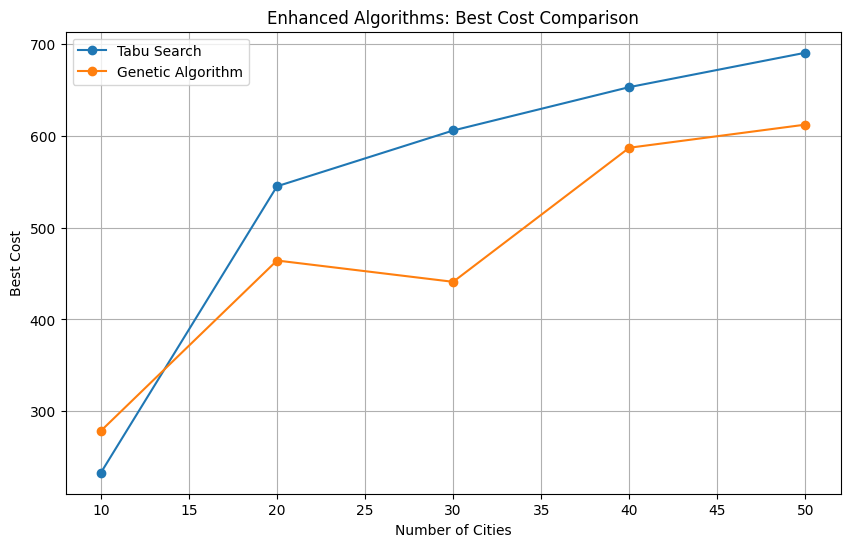

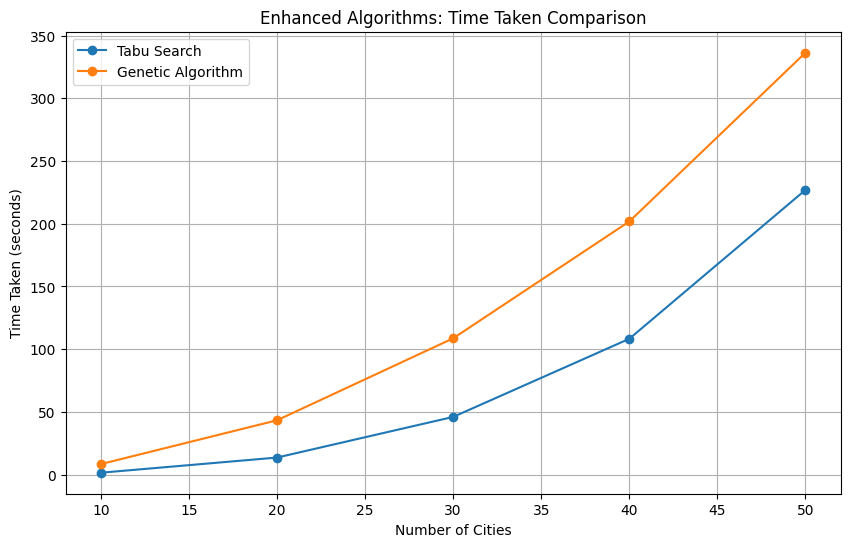

In [167]:
# Visualization: Enhanced Best Cost Comparison
plt.figure(figsize=(10, 6))
plt.plot(enhanced_comparison['Num_Cities'], enhanced_comparison['Tabu_Enhanced_Best_Cost'], marker='o', label='Tabu Search')
plt.plot(enhanced_comparison['Num_Cities'], enhanced_comparison['GA_Enhanced_Best_Cost'], marker='o', label='Genetic Algorithm')
plt.title('Enhanced Algorithms: Best Cost Comparison')
plt.xlabel('Number of Cities')
plt.ylabel('Best Cost')
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Enhanced Time Taken Comparison
plt.figure(figsize=(10, 6))
plt.plot(enhanced_comparison['Num_Cities'], enhanced_comparison['Tabu_Enhanced_Time'], marker='o', label='Tabu Search')
plt.plot(enhanced_comparison['Num_Cities'], enhanced_comparison['GA_Enhanced_Time'], marker='o', label='Genetic Algorithm')
plt.title('Enhanced Algorithms: Time Taken Comparison')
plt.xlabel('Number of Cities')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()


1. **Best Cost Comparison**:
   - This plot shows the Best Costs achieved by Enhanced Tabu Search and Enhanced Genetic Algorithm across different city sizes.
   
2. **Time Taken Comparison**:
   - This plot illustrates the computational time required by Enhanced Tabu Search and Enhanced Genetic Algorithm for varying city sizes.


## Section 8: Conclusion

#### **Summary of Findings**
1. **Algorithm Performance**:
   - **Enhanced Tabu Search** was faster, especially for larger problems, but **Enhanced Genetic Algorithm** provided  better Best Costs for larger city sizes.

2. **Design Choices**:
   - **Tabu Search**: Used a memory-based approach for efficiency and scalability, with enhancements like adaptive tabu tenure.
   - **Genetic Algorithm**: Focused on robustness and exploration, with enhancements like tournament selection and two-opt local search, but at the cost of higher time.

3. **Comprehensive Metrics**:
   - **Tabu Search** is ideal for time-sensitive tasks, while **Genetic Algorithm** is better for tasks prioritizing solution quality.

#### **Technical Problem and Justification**
The **Traveling Salesperson Problem (TSP)** required algorithms that balance exploration and exploitation:
   - **Tabu Search** was chosen for faster convergence.
   - **Genetic Algorithm** for robust exploration to avoid local minima.

#### **Strengths and Weaknesses**
1. **Tabu Search**:
   - **Strength**: Efficient for small to medium datasets.
   - **Weakness**: Limited exploration in complex landscapes.
2. **Genetic Algorithm**:
   - **Strength**: Robust for larger problems.
   - **Weakness**: High computational overhead, sensitive to parameters.

#### **Licensing Conditions and Legal Implications**
- Resources were open-source, and datasets were provided by the mentor. Compliance with licensing terms is necessary to avoid legal issues.

#### **Conclusion**
- **Tabu Search** is suited for time-sensitive tasks, while **Genetic Algorithm** excels in exploring large, complex problems. This study provides valuable insights for solving optimization problems efficiently.